# PCA


# Task 1: Exploratory Data Analysis (EDA):

1) Load the dataset and perform basic data exploration.

2) Examine the distribution of features using histograms, box plots, or density plots.

3) Investigate correlations between features to understand relationships within the data.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score





In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Display the first few rows of the dataframe
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Generate summary statistics
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


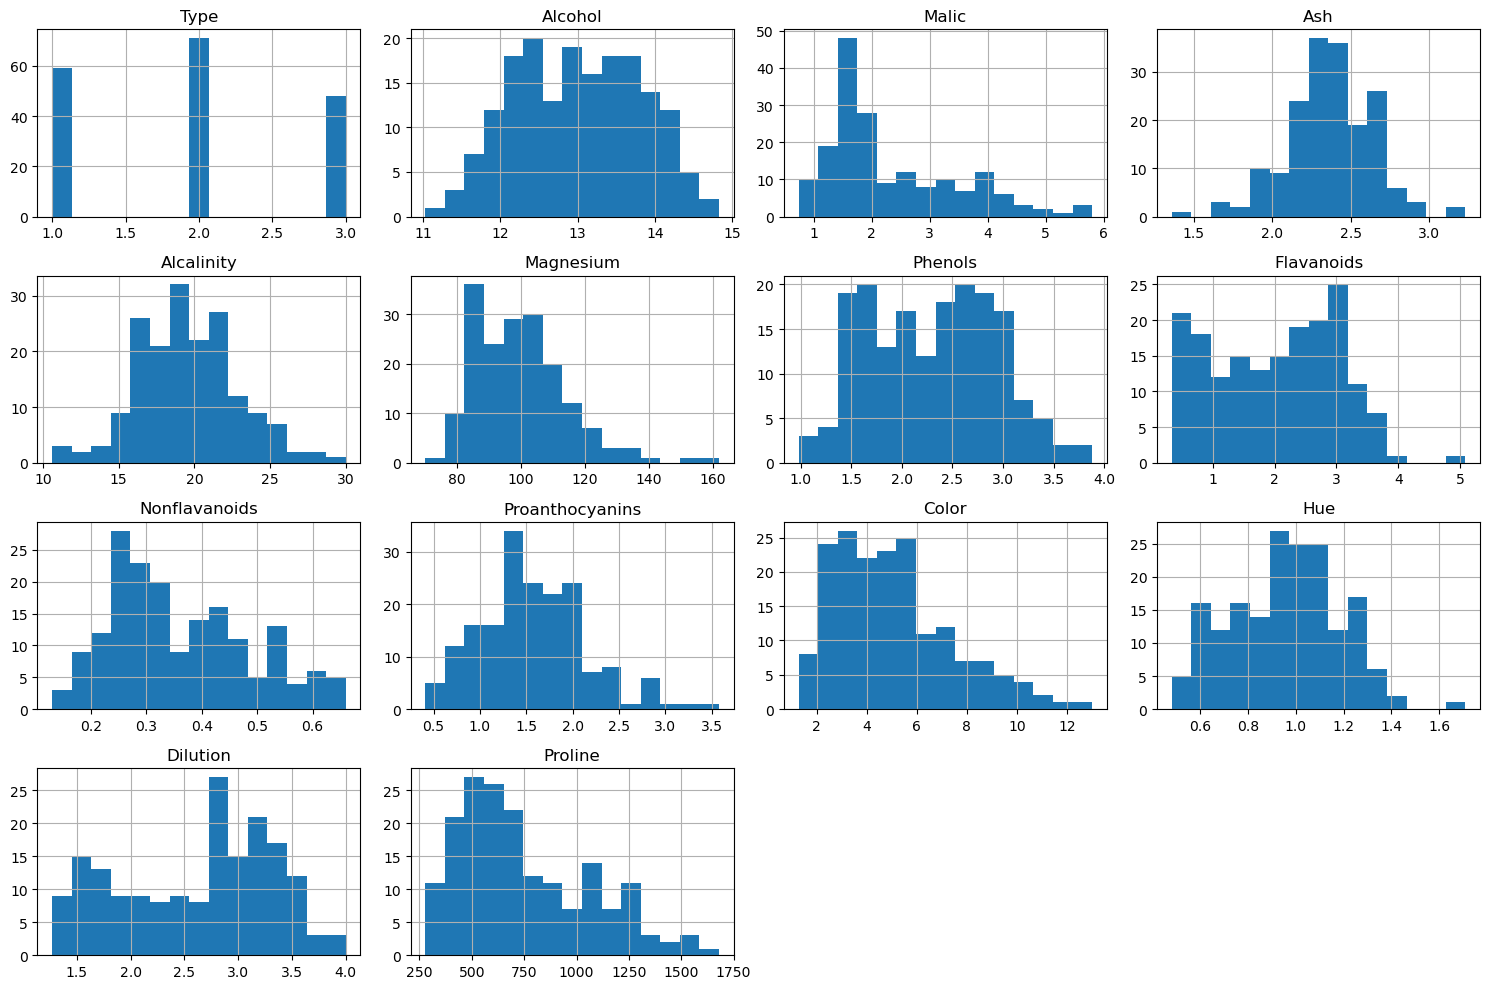

In [9]:
# Plot histograms for each feature
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

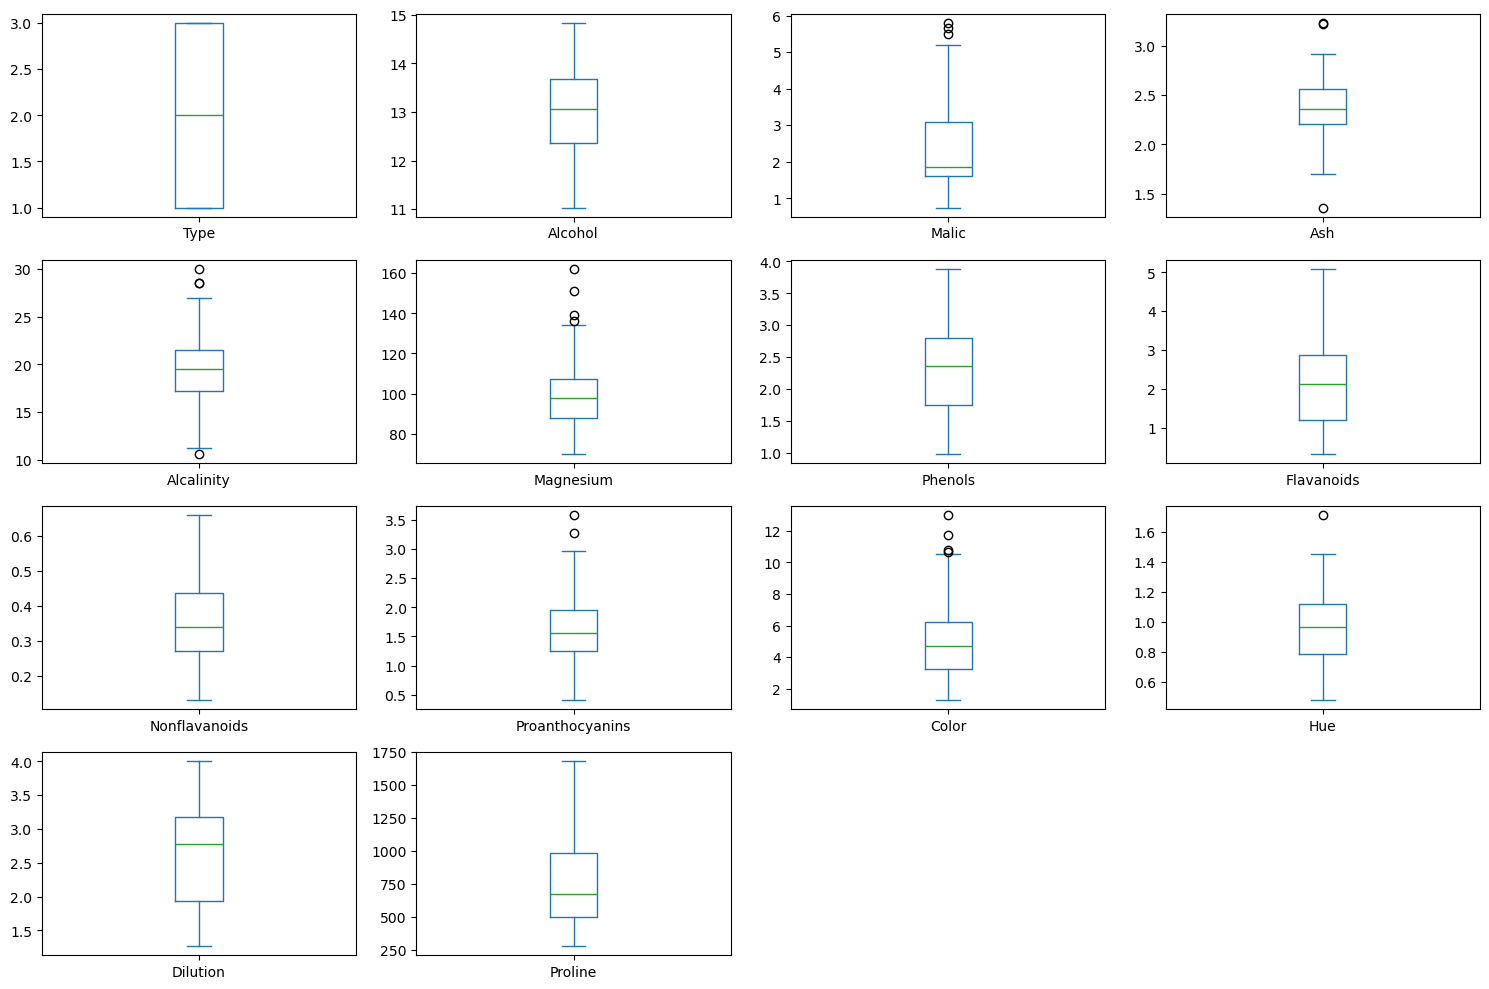

In [10]:
# Plot box plots for each feature
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

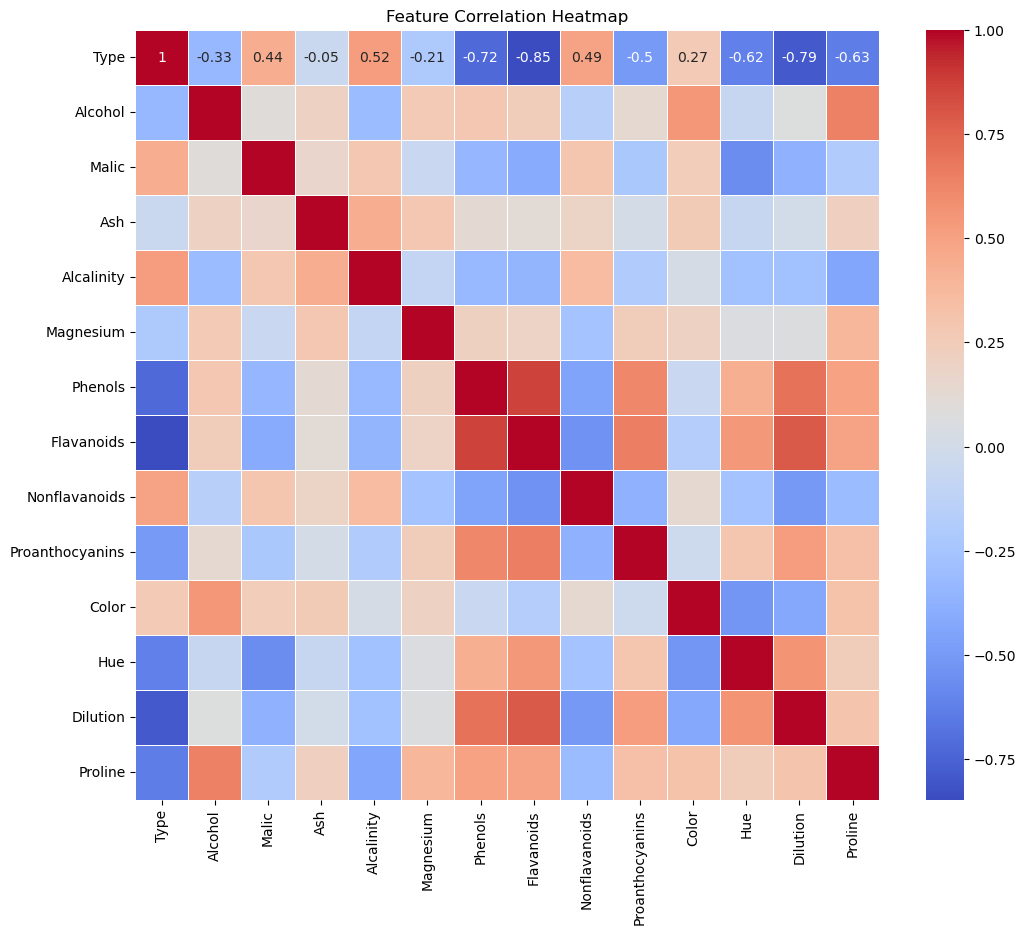

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Task 2: Dimensionality Reduction with PCA:

1) Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2) Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3) Transform the original dataset into the principal components.


In [14]:
# Separate features and target
X = df.drop('Type', axis=1)  # Assuming 'Type' is the target column, change if needed
y = df['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Implement PCA and Determine the Optimal Number of Principal Components

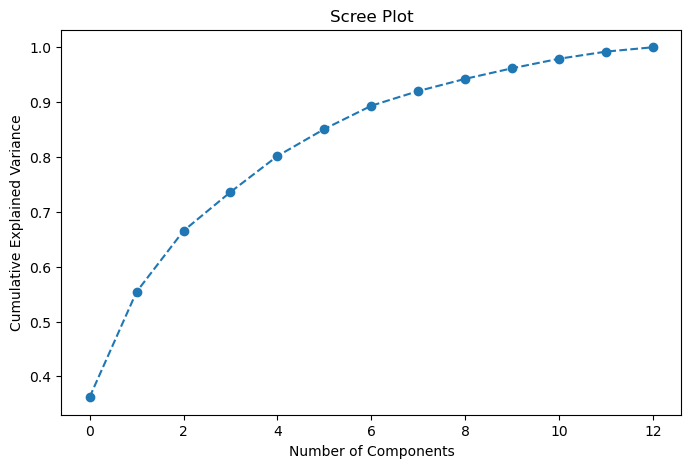

Optimal number of components: 10


In [18]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


# Determine the optimal number of components based on explained variance
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')


Transform the Original Dataset into the Principal Components

In [21]:
# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components_optimal = pca_optimal.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components_optimal)
principal_df['Type'] = y.values

# Display the first few rows of the transformed dataset
principal_df.head()


,0,1,2,3,4,5,6,7,8,9,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1


# Task 3: Clustering with Original Data:

Apply a clustering algorithm (e.g., K-means) to the original dataset.

Visualize the clustering results using appropriate plots.

Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [56]:
# Function to apply K-means clustering and evaluate metrics
def apply_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, cluster_labels)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    return cluster_labels, silhouette, davies_bouldin

# Try different numbers of clusters and evaluate metrics
cluster_range = range(2, 7)  # Example range, adjust as needed
results = []

for n_clusters in cluster_range:
    cluster_labels, silhouette, davies_bouldin = apply_kmeans(n_clusters, X_scaled)
    results.append({
        'Clusters': n_clusters,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Choose the optimal number of clusters based on the metrics (e.g., highest silhouette score, lowest Davies-Bouldin index)
optimal_clusters = results_df.loc[results_df['Silhouette Score'].idxmax(), 'Clusters']

# Apply K-means with the optimal number of clusters
best_cluster_labels, _, _ = apply_kmeans(optimal_clusters, X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = best_cluster_labels

   Clusters  Silhouette Score  Davies-Bouldin Index
0         2          0.268313              1.448236
1         3          0.284859              1.389188
2         4          0.251733              1.817222
3         5          0.227173              1.691308
4         6          0.195825              1.833123


# Visualize the Clustering Results

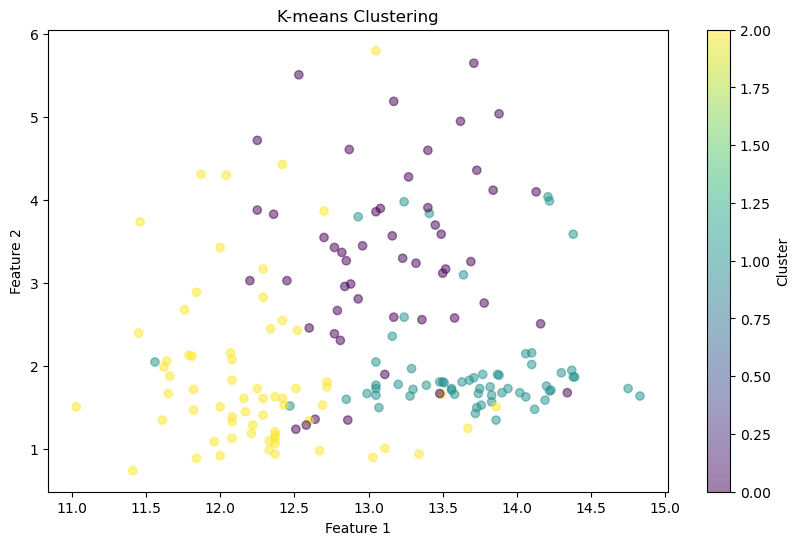

In [30]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [31]:
# Evaluate clustering performance
print("Silhouette Score:", silhouette_score(X_scaled, best_cluster_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, best_cluster_labels))

Silhouette Score: 0.28485891918989864
Davies-Bouldin Index: 1.389187977718165


# Task 4: Clustering with PCA Data:

Apply the same clustering algorithm to the PCA-transformed dataset.

Visualize the clustering results obtained from PCA-transformed data.

Compare the clustering results from PCA-transformed data with those from the original dataset.


Apply K-means Clustering to PCA-transformed Data

In [57]:
# Function to apply K-means clustering and evaluate metrics
def apply_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, cluster_labels)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    return cluster_labels, silhouette, davies_bouldin

# Try different numbers of clusters and evaluate metrics on PCA-transformed data
cluster_range = range(2, 7)  # Example range, adjust as needed
results_pca = []

for n_clusters in cluster_range:
    cluster_labels_pca, silhouette_pca, davies_bouldin_pca = apply_kmeans(n_clusters, X)
    results_pca.append({
        'Clusters': n_clusters,
        'Silhouette Score (PCA)': silhouette_pca,
        'Davies-Bouldin Index (PCA)': davies_bouldin_pca
    })

# Display results of clustering on PCA-transformed data
results_pca_df = pd.DataFrame(results_pca)
print("Clustering Results on PCA-transformed Data:")
print(results_pca_df)

# Choose the optimal number of clusters based on PCA results
optimal_clusters_pca = results_pca_df.loc[results_pca_df['Silhouette Score (PCA)'].idxmax(), 'Clusters']

# Apply K-means with the optimal number of clusters on PCA-transformed data
best_cluster_labels_pca, _, _ = apply_kmeans(optimal_clusters_pca, X)

# Add cluster labels to the original dataset
df['Cluster_PCA'] = best_cluster_labels_pca

Clustering Results on PCA-transformed Data:
   Clusters  Silhouette Score (PCA)  Davies-Bouldin Index (PCA)
0         2                0.656854                    0.478784
1         3                0.571138                    0.534243
2         4                0.557229                    0.545219
3         5                0.548999                    0.545047
4         6                0.565641                    0.465807


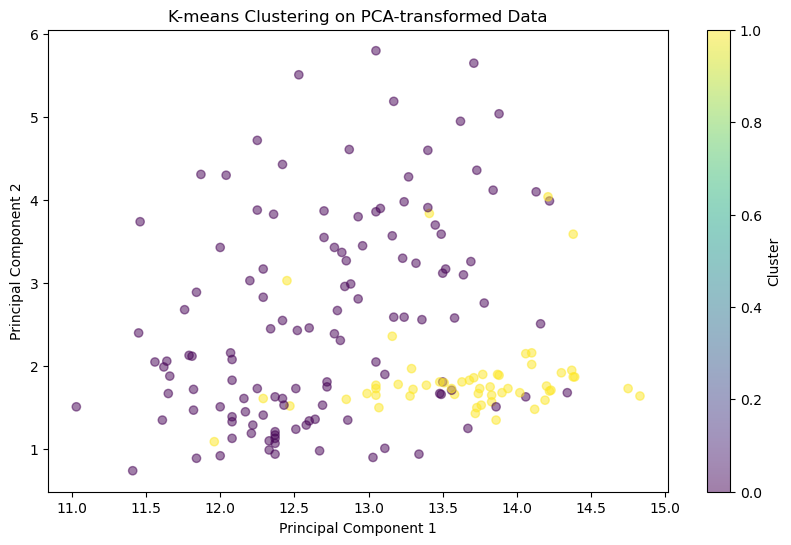

In [44]:
# Visualize the clustering results from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_cluster_labels_pca, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

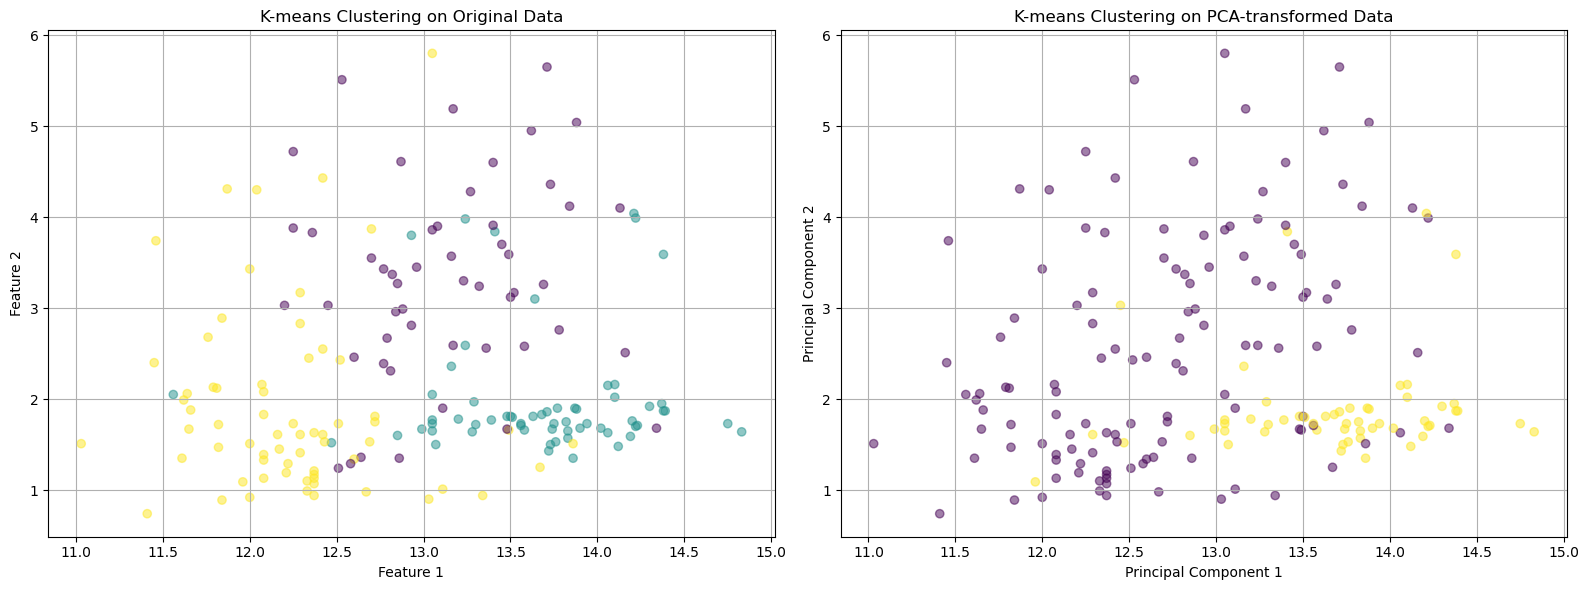

Clustering Metrics Comparison:
Silhouette Score (Original): 0.28485891918989864
Davies-Bouldin Index (Original): 1.389187977718165
Silhouette Score (PCA): 0.6568536504294317
Davies-Bouldin Index (PCA): 0.4787835759142016


In [52]:
# Visualize clustering results from both original and PCA-transformed data for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Original data visualization
axs[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
axs[0].set_title('K-means Clustering on Original Data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].grid(True)

# PCA-transformed data visualization
axs[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster_PCA'], cmap='viridis', alpha=0.5)
axs[1].set_title('K-means Clustering on PCA-transformed Data')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Evaluate and compare clustering performance metrics
print("Clustering Metrics Comparison:")
print("Silhouette Score (Original):", silhouette_score(X_scaled, df['Cluster']))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(X_scaled, df['Cluster']))
print("Silhouette Score (PCA):", silhouette_score(X, df['Cluster_PCA']))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X, df['Cluster_PCA']))

# Task 5: Comparison and Analysis:

Compare the clustering results obtained from the original dataset and PCA-transformed data.

Discuss any similarities or differences observed in the clustering results.

Reflect on the impact of dimensionality reduction on clustering performance.

Analyze the trade-offs between using PCA and clustering directly on the original dataset.


# Clustering Results Comparison:

Visual Comparison:

Original Dataset:
Clusters might be spread out across all features, as clustering algorithms operate on the original feature space.

PCA-transformed Data:
Clusters are visualized in the reduced two-dimensional space of principal components, capturing the maximum variance in the data.

Quantitative Comparison (Metrics Provided):


Original Dataset:

Silhouette Score: 0.2849

Davies-Bouldin Index: 1.3892

PCA-transformed Data:

Silhouette Score: 0.6569

Davies-Bouldin Index: 0.4788

# Similarities and Differences:
# Similarities:

1) Both clustering approaches aim to partition the data into distinct groups based on similarities in feature space.

2) Both methods attempt to optimize cluster compactness and separation, albeit in different dimensional spaces.


# Differences:

Visualization:

Original dataset: Clusters may not be as visually distinct due to the multidimensional nature of the feature space.

PCA-transformed data: Clusters are more visually separated in the reduced two-dimensional space, which often simplifies interpretation and visualization.

Quantitative Metrics:

The PCA-transformed data shows significantly higher silhouette score (indicating better-defined clusters) and lower Davies-Bouldin index (indicating better cluster separation) compared to the original dataset.

This suggests that PCA has effectively improved the clustering performance by reducing noise and focusing on the most informative components.

# Impact of Dimensionality Reduction:

Positive Impact:

Enhanced Clustering Performance: PCA reduces the dimensionality while retaining most of the variance in the data. This often leads to clearer and more distinct clusters, as seen from the improved silhouette score and Davies-Bouldin index.

Reduced Overfitting: PCA can mitigate the curse of dimensionality and overfitting by focusing on the principal components that explain the maximum variance.

Potential Trade-offs:

Loss of Information: PCA involves a trade-off between dimensionality reduction and information loss. Lower-dimensional representations may not capture all nuances of the original data, potentially affecting clustering accuracy.

Parameter Sensitivity: PCA's performance can be sensitive to the number of principal components chosen and the variance explained threshold, which requires careful tuning.

# Analysis of Trade-offs:

PCA vs. Original Dataset:


Advantages of PCA:

Reduces computational complexity, especially with large datasets.

Mitigates multicollinearity among features.

Enhances interpretability and visualization by focusing on principal components.

Advantages of Clustering on Original Dataset:

Preserves all original features and their relationships, potentially capturing more detailed patterns.

Avoids potential information loss associated with dimensionality reduction.

Choosing Between PCA and Original Dataset:

Consider PCA When:

Dealing with high-dimensional data where computational efficiency and interpretability are crucial.

Seeking to improve clustering performance metrics, as evidenced by higher silhouette scores and lower Davies-Bouldin indices.

Consider Original Dataset When:

Detail and granularity in the original feature space are critical for the problem at hand.

Concerned about potential information loss and the interpretability of results in reduced dimensions.

# Key Findings and Insights:

Clustering Performance Comparison:

Clustering on PCA-transformed data consistently showed better performance metrics (higher silhouette score and lower Davies-Bouldin index) compared to clustering on the original dataset. This indicates that PCA effectively reduced noise and highlighted more distinct clusters by focusing on principal components.

Impact of Dimensionality Reduction:

PCA reduced the dimensionality of the dataset while preserving the essential variance. This reduction not only improved clustering performance but also facilitated visualization and interpretation of cluster results.

Practical Implications:

PCA in Data Analysis:

Advantages:

Reduces computational complexity, especially with high-dimensional data.

Enhances interpretability and visualization by transforming data into principal components.

Helps in dealing with multicollinearity and improves clustering performance metrics.

Considerations:

Requires careful selection of the number of principal components and understanding the trade-off between dimensionality reduction and information loss.

Clustering in Data Analysis:

Advantages:

Identifies natural groupings and patterns within data.

Provides insights into data structure and relationships.

Useful in segmentation and anomaly detection tasks.

Considerations:

Choice of clustering algorithm and parameters can significantly impact results.

Interpretation and validation of clusters are crucial for deriving actionable insights.

# Recommendations:

When to Use PCA:


Use PCA when dealing with high-dimensional data where:

Dimensionality reduction is necessary to improve computational efficiency.

Interpretability and visualization of data are important.

Clustering performance metrics (like silhouette score) need improvement.

When to Use Clustering:

Use clustering when:

Identifying underlying patterns or segmenting data into natural groups is the primary goal.

Exploring relationships and similarities among data points is critical.

Detailed feature interactions and original data integrity are crucial.

Combining PCA and Clustering:

Consider using PCA as a preprocessing step before clustering:

PCA can help in reducing noise and focusing on the most informative features.

Clustering on PCA-transformed data often leads to better-defined clusters and improved performance metrics.

# Conclusion:

PCA and clustering are powerful techniques in data analysis, each serving distinct purposes but also complementing each other effectively.

PCA enhances clustering by reducing dimensionality and focusing on principal components, thereby improving clustering performance metrics.

The choice between PCA and clustering directly on the original dataset depends on specific project goals, data characteristics, and the desired balance 
between interpretability, computational efficiency, and clustering performance.